# "Klasifikasi Gambar Sepatu Menggunakan Teknik Machine Learning Untuk Mengidentifikasi Jenis Sepatu Dari Gambar"

- Nama: Aryasatya Muhammad Aqsel
- NIM: A11.2022.14198
- Kelas: A11.4419
- Machine Learning (Pembelajaran Mesin)
- Platform: Kaggle (Dataset: https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged)
- Tanggal: Minggu, 20 Juli 2024

# 2. Ringkasan dan Permasalahan Project

#### **Ringkasan**

Project ini bertujuan untuk mengklasifikasikan gambar sepatu ke dalam berbagai kategori menggunakan model pembelajaran mesin. Permasalahan utama adalah menentukan kategori sepatu dari gambar yang diberikan.

#### **Permasalahan Project**

- Mengidentifikasi jenis sepatu dari gambar yang bisa memiliki variasi ukuran, warna, dan sudut pandang.
- Meningkatkan akurasi klasifikasi dengan memanfaatkan teknik machine learning yang tepat.

#### Tujuan yang akan dicapai

- Membuat model klasifikasi gambar sepatu yang dapat mengidentifikasi kategori dengan akurasi tinggi.
- Meningkatkan pemahaman tentang teknik pengolahan citra dan model pembelajaran mesin untuk klasifikasi gambar.

#### Model / Alur Penyelesaian

- Pengumpulan Data: Mengunduh dan menyiapkan dataset gambar sepatu.
- Eksplorasi Data (EDA): Menganalisis dataset untuk memahami distribusi dan karakteristik data.
- Preprocessing: Membersihkan dan menyiapkan data gambar untuk model.
- Model Training: Menggunakan model pembelajaran mesin untuk melatih data, seperti CNN (Convolutional Neural Network).
- Evaluasi: Mengukur performa model menggunakan metrik evaluasi.
- Penyempurnaan Model: Menyesuaikan hyperparameter dan teknik augmentasi untuk meningkatkan hasil.

#### Bagan Alur Penyelesaian

- Pengumpulan Data ↓
       
- Eksplorasi Data (EDA) ↓
      
- Preprocessing ↓
       
- Model Training (CNN) ↓
        
- Evaluasi ↓

- Penyempurnaan Model ↓

# 3. Penjelasan Dataset, EDA, dan Proses Features Dataset

#### Dataset:
- Dataset berisi gambar-gambar sepatu dengan berbagai jenis dan kategori.
- Setiap gambar dilabeli dengan kategori yang sesuai.

#### Exploratory Data Analysis (EDA):
- Statistik Dasar: Menghitung jumlah gambar per kategori, ukuran gambar, dsb.
- Visualisasi: Membuat visualisasi distribusi kategori, contoh gambar per kategori, dan ukuran gambar.
- Kualitas Data: Memeriksa kualitas gambar dan label untuk memastikan konsistensi.

#### Proses Features Dataset:
- Normalisasi: Mengubah ukuran gambar menjadi format yang konsisten.
- Augmentasi Data: Menggunakan teknik augmentasi untuk meningkatkan variasi data seperti rotasi, pemotongan, dan penskalaan.
- Ekstraksi Fitur: Menggunakan teknik ekstraksi fitur seperti CNN untuk menangkap pola dalam gambar.

# 4. Proses Learning / Modeling

#### Model:
- Convolutional Neural Network (CNN): Digunakan untuk mengekstrak fitur dari gambar dan melakukan klasifikasi.
- Arsitektur Model: Memiliki beberapa lapisan konvolusi, lapisan pooling, dan lapisan fully connected.
- Training: Melatih model menggunakan data training dan memvalidasi menggunakan data validasi.
- Optimisasi: Menggunakan algoritma optimisasi seperti Adam atau SGD.

#### Langkah-Langkah:
- Menentukan arsitektur model.
- Melatih model dengan dataset yang telah diproses.
- Menggunakan teknik regularisasi untuk menghindari overfitting.

# 5. Peforma Model

#### Evaluasi Model:

- Metrik: Akurasi, presisi, recall, dan F1-score.
- Confusion Matrix: Untuk melihat distribusi kesalahan klasifikasi.
- Loss Curve: Untuk memantau konvergensi model selama pelatihan.

#### Hasil:

- Metrik performa model diukur dan dibandingkan dengan baseline atau model sebelumnya.
- Hasil validasi dan uji akhir dari model untuk memastikan generalisasi yang baik.

# 6. Diskusi Hasil dan Kesimpulan

#### Diskusi Hasil:
- Keakuratan Model: Apakah model mencapai tingkat akurasi yang diinginkan?
- Kesalahan Umum: Jenis kesalahan yang paling sering terjadi dan kategori yang sulit diklasifikasikan.
- Pengaruh Preprocessing: Bagaimana preprocessing mempengaruhi performa model?

#### Kesimpulan:
- Pencapaian: Model berhasil mengidentifikasi sepatu dengan akurasi tinggi dan sesuai dengan tujuan proyek.
- Peningkatan: Area yang bisa ditingkatkan dalam model atau proses, seperti teknik augmentasi atau arsitektur model.
- Rekomendasi: Rekomendasi untuk penggunaan model dalam aplikasi nyata atau perbaikan lebih lanjut.

In [25]:
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 

from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

import os

import cv2 
from skimage.io import imread

In [13]:
#Creating a dataset object using images
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('C:/AQSEL/E/KULIAH/SEMESTER 4/PEMBELAJARAN MESIN/ProposalProjekML/nike-adidas-and-converse-imaged/train')

Found 711 files belonging to 3 classes.


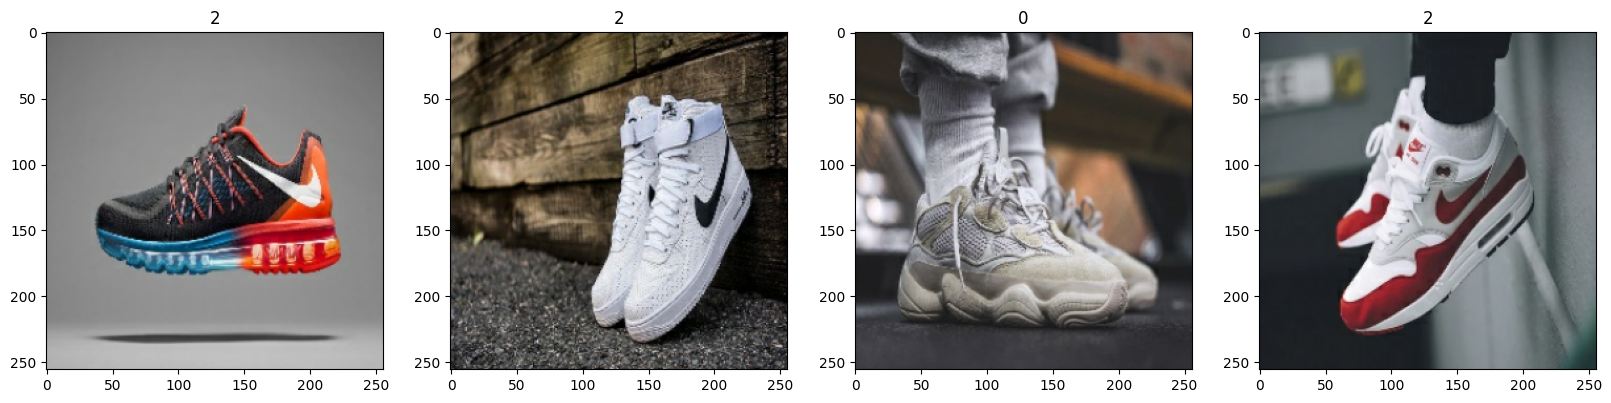

In [14]:
#Batching the data
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[1].shape
#Plotting 4 images and identifying which class is which shoe
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

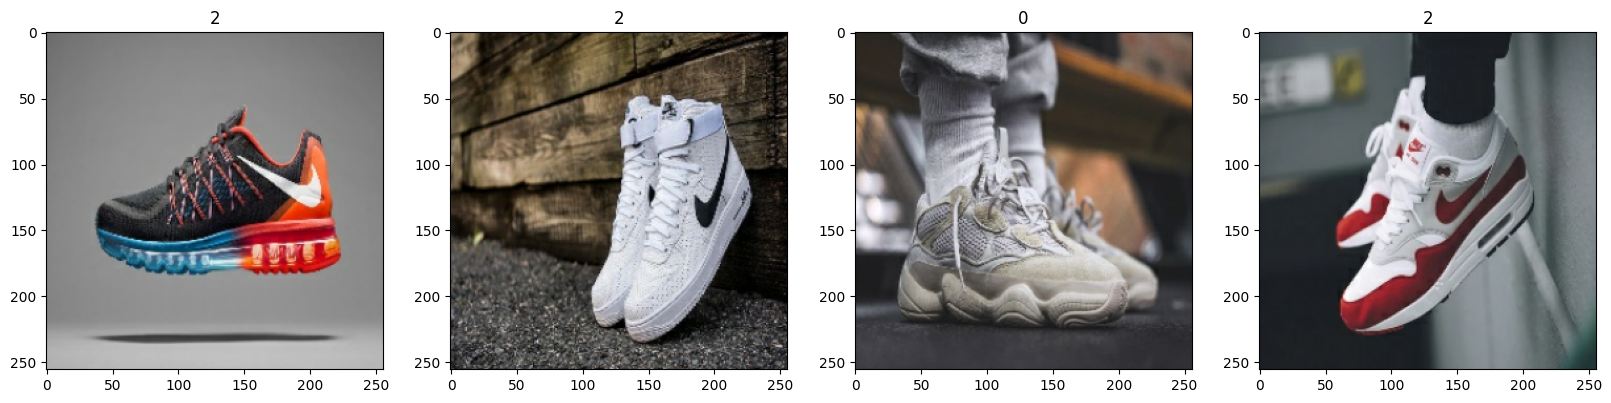

In [15]:
#Scaling and normalizing the data
data = data.map(lambda x,y: (x/255,y))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
len(data)

23

In [17]:
#Splitting the Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [19]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

#Building the model
model = Sequential()
#Input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3))

#Compiling the model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 460800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    58,982,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,168,387 (225.71 MB)

 Trainable params: 59,168,387 (225.71 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#Training the model
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.3457 - loss: 8.2929 - val_accuracy: 0.4609 - val_loss: 1.0927
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4168 - loss: 1.1101 - val_accuracy: 0.4531 - val_loss: 1.0881
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4197 - loss: 1.0744 - val_accuracy: 0.5703 - val_loss: 0.9981
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5504 - loss: 0.9869 - val_accuracy: 0.6328 - val_loss: 0.8704
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6558 - loss: 0.7688 - val_accuracy: 0.6719 - val_loss: 0.8188
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7461 - loss: 0.6813 - val_accuracy: 0.7188 - val_loss: 0.6890
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8098 - loss: 0.5109 - val_accuracy: 0.7812 - val_loss: 0.5129
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8752 - loss: 0.3683 - val_accuracy: 0.8906 - val_loss:

In [22]:
#Predicting using text data
yhat = model.predict(test)
yhat

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step


array([[-2.69272494e+00,  3.88166857e+00,  1.39676869e-01],
       [ 1.94083190e+00,  2.48449855e-02, -1.01850665e+00],
       [-4.99446951e-02, -1.49584973e+00,  7.26968479e+00],
       [-5.94431460e-01, -7.06126690e+00,  8.82277203e+00],
       [-3.47497582e+00,  7.98818016e+00, -2.09692264e+00],
       [ 6.03223228e+00,  1.80108583e+00, -1.61671519e+00],
       [ 1.35811579e+00, -5.54233752e-02, -6.33232474e-01],
       [ 5.22762156e+00,  2.69824743e+00, -4.19607782e+00],
       [ 4.75319576e+00, -8.66155565e-01,  6.54345393e-01],
       [-4.21278626e-01,  1.02582254e+01, -1.29084730e+00],
       [ 1.42014575e+00,  7.92494297e+00, -9.93439928e-03],
       [ 4.48362648e-01, -1.28684163e+00,  3.90712643e+00],
       [-4.19489145e+00, -1.08206499e+00,  7.15235376e+00],
       [ 1.26063538e+01, -4.41626978e+00, -2.63303280e+00],
       [ 7.37985754e+00,  1.17545569e+00, -1.65054059e+00],
       [ 4.89405155e+00, -1.81828094e+00, -9.24333751e-01],
       [ 6.64605141e+00, -2.35016465e+00

In [24]:
#Evaluating Model
loss, acc = model.evaluate(test, verbose = 0) 
print("Test Accuracy:", acc)


Test Accuracy: 0.9295774698257446
